# Seasonal Decomposing Forecasting

* The methods used here is to forecast residuals after removing the Season and the Trend.
* With this method, we don't need to add season or trend back for forecasting.
* There are additive and multiplicative decomposing 2 methods.
  * Additive Method: `Y[t] = T[t] + S[t] + e[t]`
  * Miltiplicative Method: `Y[t] = T[t] * S[t] * e[t]`

In [49]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
sample_train_df1 = pd.read_pickle('sample_train_df1.pkl')
sample_test_df1 = pd.read_pickle('sample_test_df1.pkl')
print(sample_train_df1.shape, sample_test_df1.shape)

sample_train_df2 = pd.read_pickle('sample_train_df2.pkl')
sample_test_df2 = pd.read_pickle('sample_test_df2.pkl')
print(sample_train_df2.shape, sample_test_df2.shape)

sample_train_df1.head()

(100, 2) (14, 2)
(100, 2) (10, 2)


purchase_amount  client_count
purchase_date                               
2019-02-11            58743.49           470
2019-02-12            73984.82           686
2019-02-13            95749.55           876
2019-02-14           118723.62          1095
2019-02-15           152350.76          1379

## Decomposing Plot
Decompose trend, seasonality are separated out from data.

### Sample 1
#### Additive Decomposing

In [5]:
col = sample_train_df1['client_count']

decomposition = seasonal_decompose(col, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(col, label='Original')
plt.title('Additive Decomposing - Training Sample 1')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

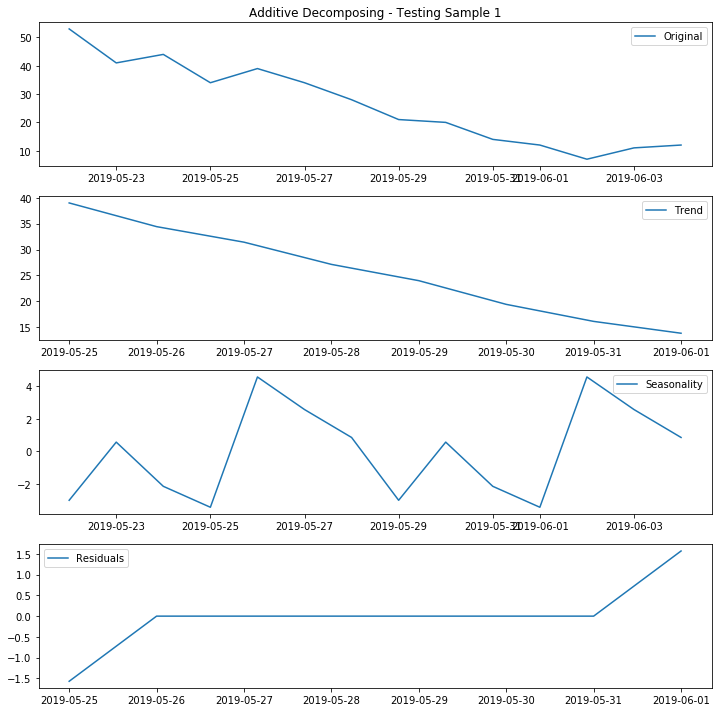

In [8]:
col = sample_test_df1['client_count']

decomposition = seasonal_decompose(col, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(col, label='Original')
plt.title('Additive Decomposing - Testing Sample 1')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Multiplicative Decomposing

In [21]:
col = sample_train_df1['client_count']

decomposition = seasonal_decompose(col, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(col, label='Original')
plt.title('Multiplicative Decomposing - Training Sample 1')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

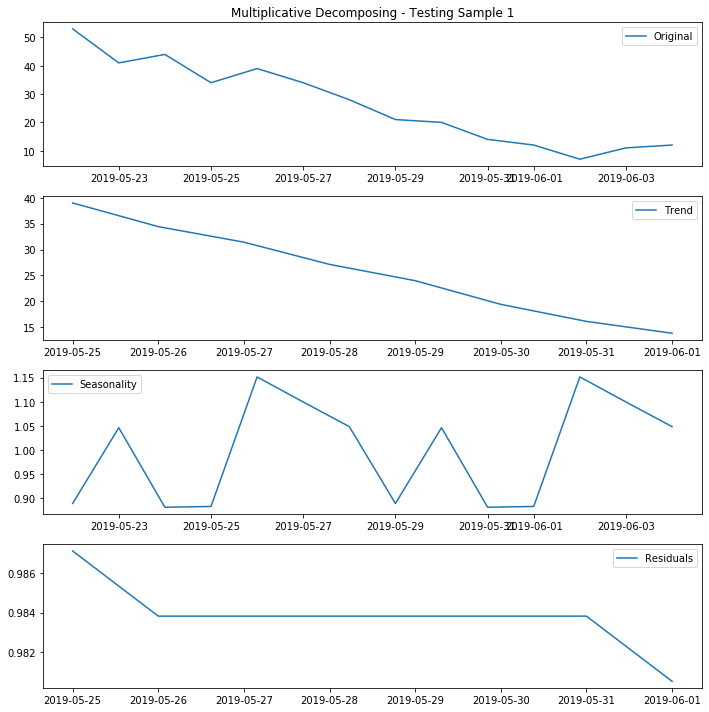

In [22]:
col = sample_test_df1['client_count']

decomposition = seasonal_decompose(col, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(col, label='Original')
plt.title('Multiplicative Decomposing - Testing Sample 1')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Note

* It seems that, for Sample 1, multiplicative method is better since its residuasl look more random, the residuals from the additive method has a bit trend left.

### Sample 2

#### Additive Decomposing

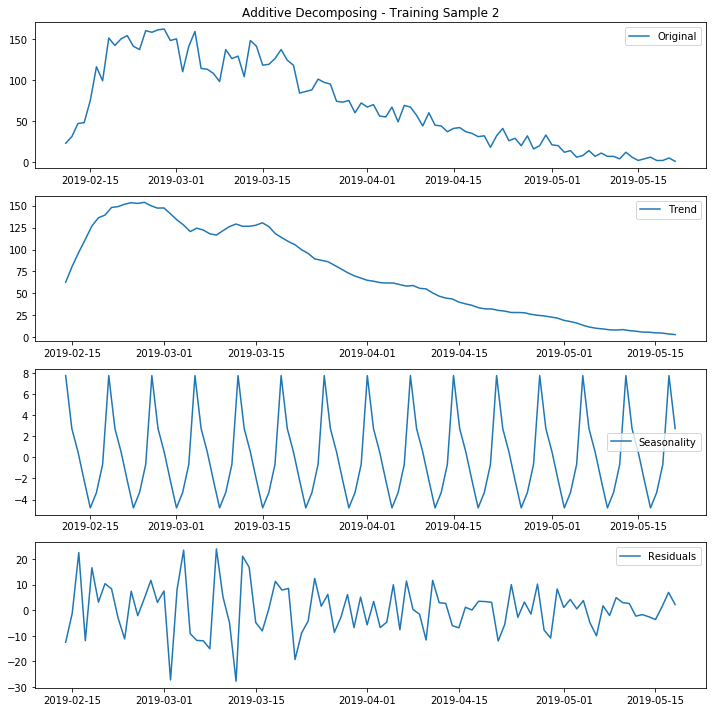

In [23]:
col = sample_train_df2['client_count']

decomposition = seasonal_decompose(col, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(col, label='Original')
plt.title('Additive Decomposing - Training Sample 2')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

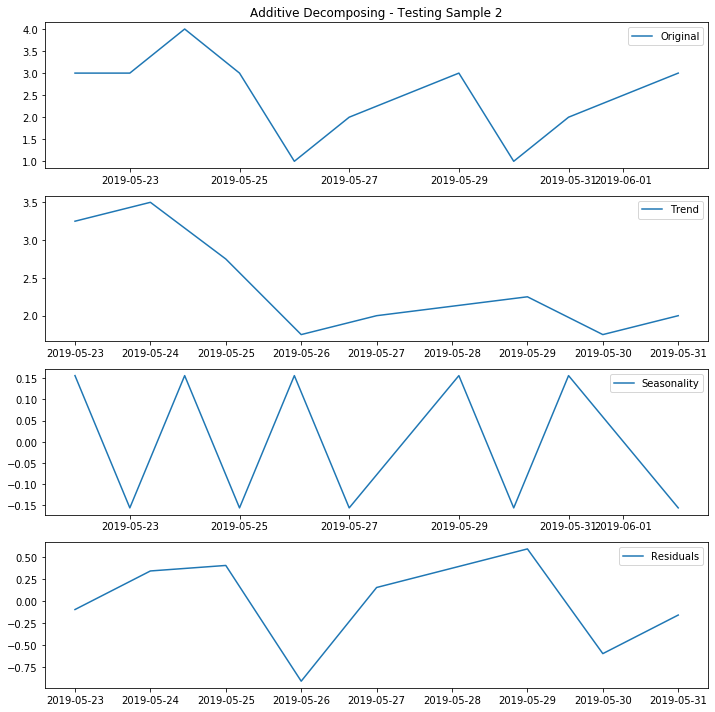

In [25]:
col = sample_test_df2['client_count']

decomposition = seasonal_decompose(col, model='additive', period=2)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(col, label='Original')
plt.title('Additive Decomposing - Testing Sample 2')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Multiplicative Decomposing

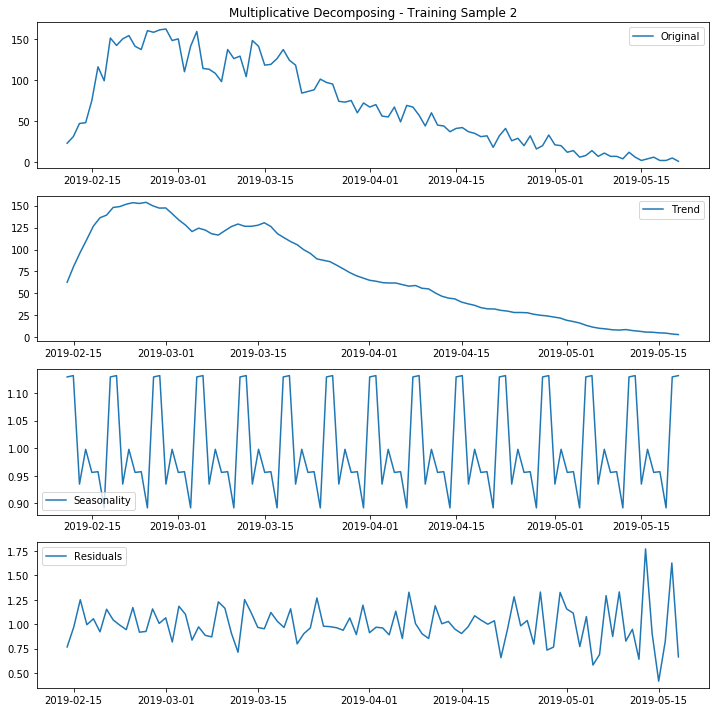

In [26]:
col = sample_train_df2['client_count']

decomposition = seasonal_decompose(col, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(col, label='Original')
plt.title('Multiplicative Decomposing - Training Sample 2')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

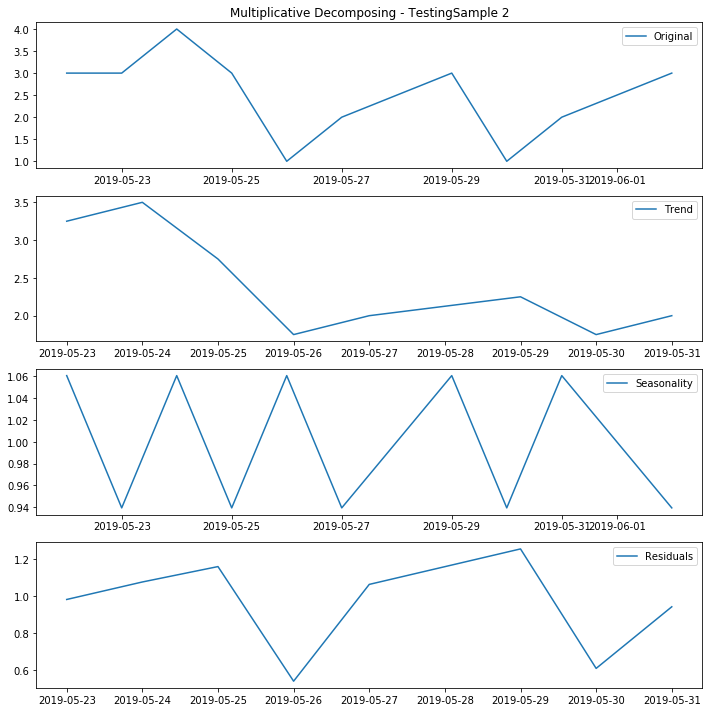

In [28]:
col = sample_test_df2['client_count']

decomposition = seasonal_decompose(col, model='multiplicative', period=2)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(col, label='Original')
plt.title('Multiplicative Decomposing - TestingSample 2')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Note

* For Sample 2, both additive method and multiplicative method look good, residuals all look random. Better to check in the next forecasting section.

## Forecasting Residuals

* Normally we should check whether the residuals is stationary before forecasting. However, some forecasting methods can handle trend or seasons in the time series, doesn't need the data to be strict stationary. Meanwhile, even if the residuals are not stationary, if we keep doing more work to make it stationary, and may not get better forecasting results, not worthy.
* The main mathod used in each approach is:
  * Forecast the testing time series
  * Plot the difference and calculate RMSE

In [66]:
train1_col = sample_train_df1['client_count']
train2_col = sample_train_df2['client_count']
test1_col = sample_test_df1['client_count']
test2_col = sample_test_df2['client_count']

# Sample 1 residuals
decomposition1_train = seasonal_decompose(train1_col, model='multiplicative')
decomposition1_test = seasonal_decompose(test1_col, model='multiplicative')
residual1_train = decomposition1_train.resid
residual1_test = decomposition1_test.resid

# Sample 2 residuals - additive
decomposition2_train_add = seasonal_decompose(train2_col, model='additive')
decomposition2_test_add = seasonal_decompose(test2_col, model='additive', period=2)
residual2_train_add = decomposition2_train_add.resid
residual2_test_add = decomposition2_test_add.resid

# Sample 2 residuals - multiplicative
decomposition2_train_mulp = seasonal_decompose(train2_col, model='multiplicative')
decomposition2_test_mulp = seasonal_decompose(test2_col, model='multiplicative', period=2)
residual2_train_mulp = decomposition2_train_mulp.resid
residual2_test_mulp = decomposition2_test_mulp.resid

### Approach 1 - Naive Forecast

* It uses the latest x days values as current x days values.
* Sounds so naive, right? The reason I start with it is because, as we can see the original time series plot, the last 10 ~ 14 days are similat to its latest previous period. Therefore, using the latest period for forecasting might work better than using the whole time series.

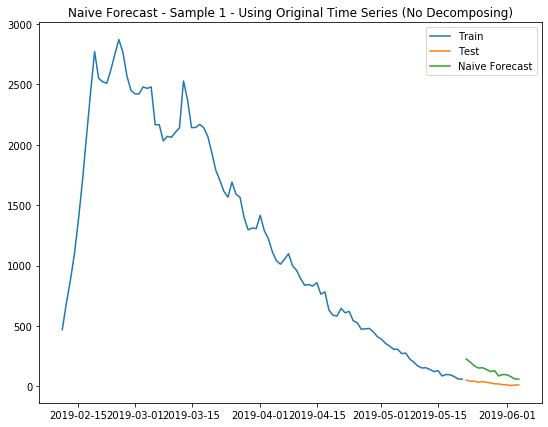

RMSE: 106.4642797239659


In [58]:
train = sample_train_df1['client_count'].copy()
test = sample_test_df1['client_count'].copy()
y_pred = train.iloc[-len(test):]
y_pred.index = test.index

plt.figure(figsize=(9,7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(y_pred.index, y_pred, label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast - Sample 1 - Using Original Time Series (No Decomposing)")
plt.show()

rmse = sqrt(mean_squared_error(test, y_pred))
print('RMSE:', rmse)

In [69]:
test

purchase_date
2019-05-25    0.987111
2019-05-26    0.983819
2019-05-27    0.983819
2019-05-28    0.983819
2019-05-29    0.983819
2019-05-30    0.983819
2019-05-31    0.983819
2019-06-01    0.980527
Name: resid, dtype: float64

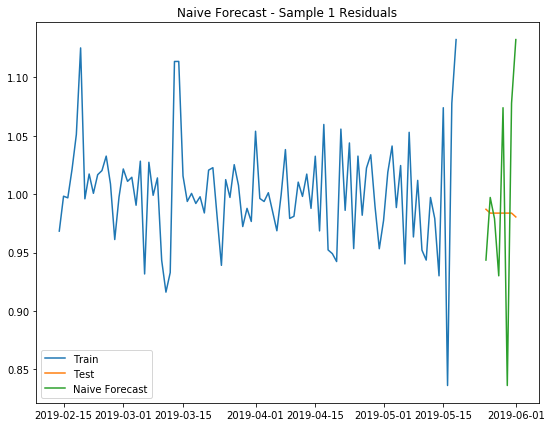

RMSE: 0.09145212195066141


In [70]:
train = residual1_train.copy().dropna()
test = residual1_test.copy().dropna()
y_pred = train.iloc[-len(test):]
y_pred.index = test.index

plt.figure(figsize=(9,7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(y_pred.index, y_pred, label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast - Sample 1 Residuals")
plt.show()

rmse = sqrt(mean_squared_error(test, y_pred))
print('RMSE:', rmse)